# Seattle ABNB Using CRISP-DM (Cross-Industry Standard Process for Data Mining)¶

GitHub Link: https://github.com/vasutaria/CRISP-DM_Seattle_ABNB.git
Blog Post: https://medium.com/@vaishali.sutaria/talk-abnb-going-public-investor-whats-in-it-for-you-fa13f18608d9

# CRISP-DM (Cross-Industry Standard Process for Data Mining)

I will be following the CRISP-DM process (Cross-Industry Standard Process for Data Mining) to answer the questions.

The first step is to understand the business drivers. Ensure value is provided in the correct focus areas. This involves understanding the business context and domain. Data Understanding

The second step is to collect data, describe and explore data. Usually includes checking for data quality issues and understanding what data is available and what is not. Data Preparation

The third step is to select relevant data in context to our questions, clean data and generate new data fields, and integrate data. The output will be data sets ready for use in analysis and modelling. Modeling

In fourth step select modelling technique (simple or complex), build model and assess model. Evaluation

Fifth step is to evaluate which model meets business goals and answers the business questions. Ideally, we draw conclusions related to the questions posed. Plan for potential future steps. 

The 6th step is the final Deployment, I call it the execution phase. In this phase you determine a strategy for deployment.

There are 3 different files with data on the Seattle ABNB.
listings.csv = provides all the details on various ABNB listings 
reviews.csv = This contains the reviews the customers have left
calendar.csv = This contains the listings of the ABNB

# Explore Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.svm import SVC #(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier #(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

%matplotlib inline

df = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_review = pd.read_csv('reviews.csv')
df.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [2]:
# Assessing
print("Size of dataframes, rows, columns \n", 
      "Calendar : ", df_calendar.shape, "\n",
      "Listings : ", df.shape, "\n",
      "Reviews : ", df_review.shape,)

Size of dataframes, rows, columns 
 Calendar :  (1393570, 4) 
 Listings :  (3818, 92) 
 Reviews :  (84849, 6)


In [3]:
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [4]:
df_calendar.shape
df_calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df_review.shape

(84849, 6)

In [6]:
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe 
cat_df.shape[1]

62

In [7]:
cat_df.head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


In [8]:
Num_df = df.select_dtypes(include=['int','float']) # Subset to a dataframe only holding the categorical columns

Num_df.shape[1]

30

In [9]:
Num_df.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89


In [10]:
# Check for missing values in the columns for each dataset- returning missing value as a percentage
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

license             100.000000
square_feet          97.459403
monthly_price        60.267156
security_deposit     51.126244
weekly_price         47.380828
                       ...    
accommodates          0.000000
bed_type              0.000000
amenities             0.000000
price                 0.000000
id                    0.000000
Length: 92, dtype: float64

In [11]:
# Check for missing values in the columns for each dataset- returning missing value as a percentage
(df_calendar.isnull().sum()/len(df_calendar)*100).sort_values(ascending=False)

price         32.938998
available      0.000000
date           0.000000
listing_id     0.000000
dtype: float64

In [12]:
# Check for missing values in the columns for each dataset- returning missing value as a percentage
(df_review.isnull().sum()/len(df_review)*100).sort_values(ascending=False)

comments         0.021214
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

Which column has the most missing values

I decided to define function to graph because i will be using similar graph at different times in this analysis.

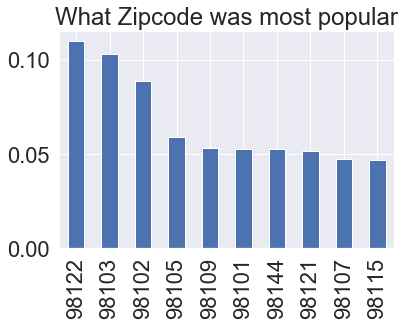

In [144]:
def get_graph(name,column_name, df=df):
    '''
    INPUT - 
    name - string - name of the graph
    column_name - string - the name of the column you would like to know about
    df = dataframe you are using
    OUTPUT - graph of Top 10 count of column name. 
    '''
    status_vals = df[column_name].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(name);
    return (status_vals[:10]/df.shape[0]).plot(kind="bar")


get_graph('What Zipcode was most popular','zipcode',df)

# Clean Data

In [14]:
#Now lets only select the needed columns only from listings csv. relevant to answer the questions
df1 = df.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'latitude', 'longitude', 'guests_included', 'extra_people', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month', 'calendar_updated','cleaning_fee','is_location_exact','smart_location','neighbourhood_group_cleansed'], axis=1)


In [15]:
df1.columns
#df1.shape

Index(['id', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'country_code', 'country', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [16]:
df_calendar.columns
df_calendar = df_calendar.drop(['price'], axis = 1)

In [17]:
# lets try to drop all the rows with missing values in 3 columns with price
cleaned_df = df.dropna(subset=['price','weekly_price','monthly_price'], how='any')

In [18]:
# what is the shape of the df now after removing rows with missing price
cleaned_df.shape

(1417, 92)

In [19]:
# removing nulls from the 3 columns reduced the rows.  Let me instead only remove the price instead 
cleaned_df2 = df1.dropna(subset =['price'], how = 'any')

#now lets check the shape
cleaned_df2.shape

(3818, 27)

In [20]:
# looks like there are no nulls so will move forward with the original dataframe with relevant features only.
df1.shape

(3818, 27)

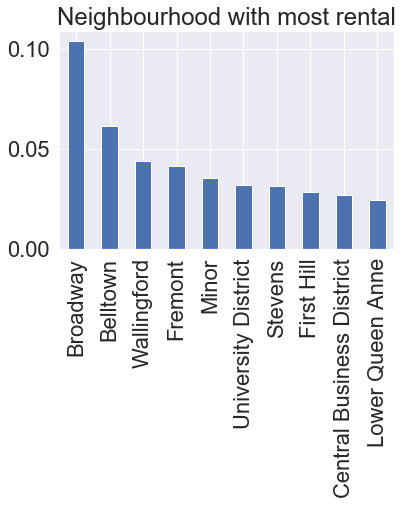

In [139]:
get_graph('Neighbourhood with most rental','neighbourhood_cleansed',df)

In [22]:
# clean up price column from the dataframe and replace the $
df1['price'] = df1['price'].str.replace('$', '')
df1.head()

,id,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,country_code,country,property_type,...,square_feet,price,weekly_price,monthly_price,security_deposit,minimum_nights,maximum_nights,jurisdiction_names,instant_bookable,cancellation_policy
0,241032,Queen Anne,West Queen Anne,Seattle,WA,98119,Seattle,US,United States,Apartment,...,NaN,85.00,NaN,NaN,NaN,1,365,WASHINGTON,f,moderate
1,953595,Queen Anne,West Queen Anne,Seattle,WA,98119,Seattle,US,United States,Apartment,...,NaN,150.00,"$1,000.00","$3,000.00",$100.00,2,90,WASHINGTON,f,strict
2,3308979,Queen Anne,West Queen Anne,Seattle,WA,98119,Seattle,US,United States,House,...,NaN,975.00,NaN,NaN,"$1,000.00",4,30,WASHINGTON,f,strict
3,7421966,Queen Anne,West Queen Anne,Seattle,WA,98119,Seattle,US,United States,Apartment,...,NaN,100.00,$650.00,"$2,300.00",NaN,1,1125,WASHINGTON,f,flexible
4,278830,Queen Anne,West Queen Anne,Seattle,WA,98119,Seattle,US,United States,House,...,NaN,450.00,NaN,NaN,$700.00,1,1125,WASHINGTON,f,strict


# What is the most popular price?

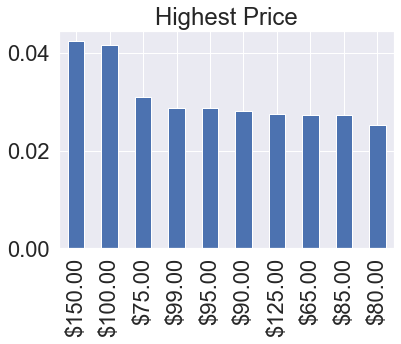

In [146]:
get_graph('Highest Price','price',df)

$150 seems to be the most popular daily price in Seattle.

In [24]:
#clean price data by removing the dollar sign and converting to float
#Columns with prices are [price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people]

func1 = lambda a: a.replace('$','')
func2 = lambda a: a.replace(',','')
func3 = lambda a: a.replace('','_')

price_cols = ["price","weekly_price","monthly_price","security_deposit"]
for temp in price_cols:
    df1[temp] = df1[temp].astype("str")
    df1[temp] = df1[temp].apply(func1)
    df1[temp] = df1[temp].apply(func2)
    df1[temp] = df1[temp].astype("float")


# Which neighbourhood had the most expensive listings in Seattle?

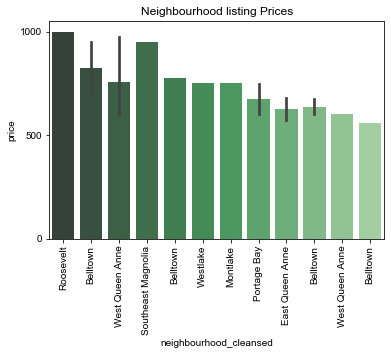

In [25]:
#neighbourhood with most expensive listing

neighbourhood_price = df1[["price", "neighbourhood_cleansed"]][df1["price"] > df1["price"].mean()]
neighbourhood_price = neighbourhood_price.sort_values("price", ascending = False)
neighbourhood_price = neighbourhood_price.iloc[0:20,:]
g = sns.barplot(data = neighbourhood_price, x = "neighbourhood_cleansed", y = "price",palette="Greens_d")
g.set_xticklabels(labels =neighbourhood_price["neighbourhood_cleansed"] , rotation=90)
g.set_title("Neighbourhood listing Prices")
sns.set(font_scale = 2)

plt.show()

Roosevelt neighbourhood had the highest price of $1000 dollars in Seattle.

In [26]:
neighbourhood_price

,price,neighbourhood_cleansed
3122,1000.0,Roosevelt
1208,999.0,Belltown
2,975.0,West Queen Anne
3443,950.0,Southeast Magnolia
1279,899.0,Belltown
565,775.0,Westlake
2566,750.0,Montlake
2518,750.0,Portage Bay
239,749.0,East Queen Anne
1312,700.0,Belltown


In [27]:
# If grouped by neighbourhood which neighbourhood had the highest price.  
df_review.groupby('id')
df1.groupby(['neighbourhood_cleansed']).mean().sort_values(by = 'price', ascending=False)

,id,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,minimum_nights,maximum_nights
neighbourhood_cleansed,,,,,,,,,,,,
Southeast Magnolia,5.410773e+06,3.764706,1.617647,1.588235,1.823529,NaN,231.705882,1017.857143,3100.000000,226.818182,2.176471,545.705882
Portage Bay,5.483062e+06,4.571429,1.750000,2.071429,2.500000,NaN,227.857143,1581.250000,6683.333333,420.000000,1.785714,968.285714
Westlake,6.628782e+06,3.294118,1.470588,1.411765,1.882353,NaN,194.470588,835.444444,2750.000000,450.000000,2.647059,938.294118
West Queen Anne,5.506100e+06,3.907692,1.446154,1.569231,2.092308,NaN,187.769231,1028.000000,3096.210526,371.764706,2.030769,733.153846
Montlake,5.492740e+06,4.157895,1.394737,1.789474,2.210526,900.000000,182.789474,1022.555556,4207.800000,166.666667,1.947368,852.315789
Briarcliff,5.355968e+06,5.928571,1.678571,2.000000,2.928571,NaN,176.571429,1103.166667,3575.000000,407.000000,1.857143,965.500000
Sunset Hill,4.890749e+06,3.277778,1.555556,1.611111,1.833333,NaN,176.055556,937.666667,3283.571429,541.666667,1.833333,678.833333
Industrial District,4.716727e+06,3.333333,1.083333,1.000000,1.666667,NaN,173.333333,625.000000,1525.000000,200.000000,1.333333,752.666667
Alki,6.152711e+06,4.095238,1.321429,1.714286,2.119048,1400.000000,171.619048,971.875000,3185.166667,250.000000,2.690476,798.880952


Looks like Southeast Magnolia had the highest price of $231 which accomodates 3.7 average and 1.6 bathroom.  Rainier Beach had the lowest price of $68 accomodates average 2.6 with 1 bathroom.

In [150]:
df1.groupby(['neighbourhood_cleansed']).mean()
df1.groupby(['property_type']).mean().sort_values(by = 'monthly_price',ascending = False)

,id,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,minimum_nights,maximum_nights
property_type,,,,,,,,,,,,
Condominium,7.574381e+06,3.406593,1.225275,1.241758,1.692308,800.000000,151.109890,1018.023256,3259.000000,400.089286,2.274725,857.318681
Townhouse,7.187256e+06,3.457627,1.550847,1.508475,1.813559,2100.000000,129.457627,844.649123,2924.888889,354.769231,1.559322,818.754237
Apartment,5.759030e+06,3.105972,1.096357,1.033451,1.528689,681.750000,122.932670,787.097076,2698.872180,241.903990,2.690867,846.063817
House,5.158640e+06,3.643970,1.399652,1.609122,1.948614,1039.918367,132.351414,783.984631,2513.466113,319.217441,2.186959,718.881131
Loft,5.964044e+06,3.000000,1.125000,0.750000,1.650000,NaN,135.700000,901.750000,2472.083333,287.857143,1.700000,720.725000
Bed & Breakfast,4.763049e+06,2.216216,1.648649,1.000000,1.351351,2.000000,112.054054,697.684211,2385.416667,235.555556,1.648649,668.000000
Chalet,5.349695e+05,2.500000,1.000000,1.000000,2.000000,600.000000,98.500000,587.500000,2325.000000,NaN,2.500000,1125.000000
Boat,4.624355e+06,3.125000,1.750000,1.750000,2.250000,300.000000,282.375000,602.500000,2197.500000,750.000000,1.375000,868.250000
Bungalow,8.349556e+06,2.846154,1.192308,0.615385,1.538462,NaN,115.615385,648.571429,2140.000000,310.000000,1.615385,798.230769


If we group the data by property type and sort by the monthly price Condominiums had highest monthly price of $3259 and Cabin had the lowest monthly price $1544

In [29]:
# combine all date calendar with listings to help us understand the revenue generated
df_new = pd.merge(df1, df_calendar, left_on='id', right_on='listing_id')


In [30]:
df_new.shape
#df_calendar_combined.shape

(1393570, 30)

In [31]:
# Check for missing values in the columns for each dataset- returning missing value as a percentage
(df_new.isnull().sum()/len(df_new)*100).sort_values(ascending=False)

square_feet               97.459403
monthly_price             60.267156
security_deposit          51.126244
weekly_price              47.380828
neighbourhood             10.895757
bathrooms                  0.419068
zipcode                    0.183342
bedrooms                   0.157150
property_type              0.026192
beds                       0.026192
market                     0.000000
state                      0.000000
accommodates               0.000000
city                       0.000000
country_code               0.000000
neighbourhood_cleansed     0.000000
country                    0.000000
room_type                  0.000000
available                  0.000000
date                       0.000000
bed_type                   0.000000
amenities                  0.000000
price                      0.000000
minimum_nights             0.000000
maximum_nights             0.000000
jurisdiction_names         0.000000
instant_bookable           0.000000
cancellation_policy        0

Before handling the missing values in the combined dataframe I wanted to see the correlation matrix.  If there is high correlation then that data does not do me any good predicting so instead of handling them by replacing values i can simply drop them from the dataframe.

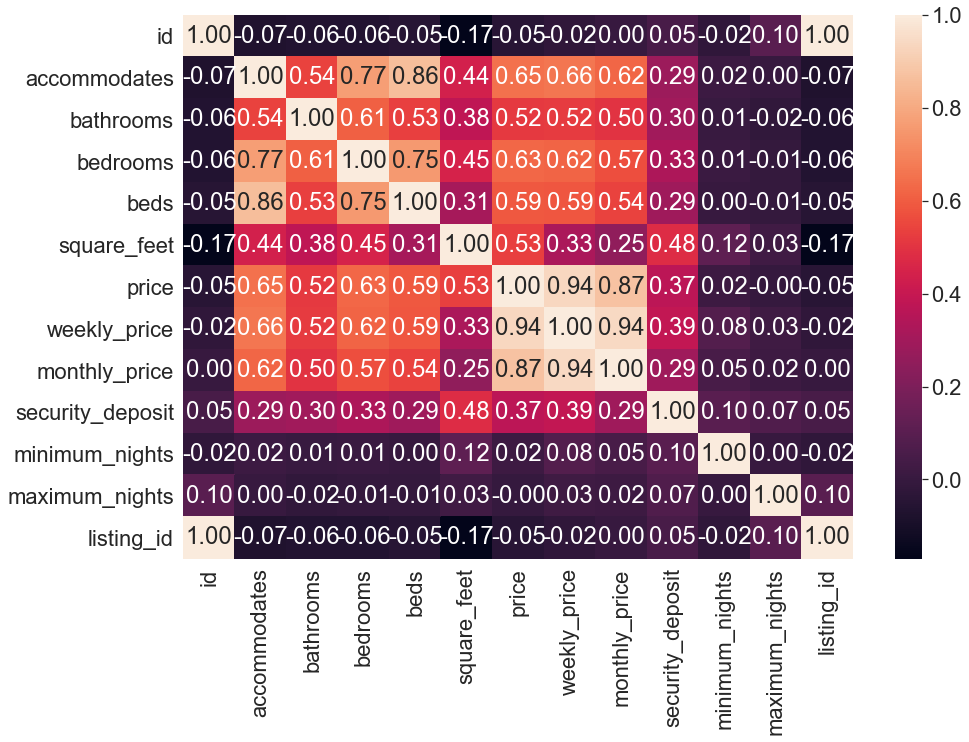

In [35]:
import matplotlib as plt
fig, ax = plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True, fmt='.2f');

# What property type generates the highest revenue?

In [36]:
#Which property_type yields the highest revenue regardless of if the propery was available or not available in 2016.
df_new.groupby(['property_type']).sum()['price'].sort_values(ascending = False)

property_type
House              83718225.0
Apartment          76638685.0
Townhouse           5575740.0
Condominium         5019115.0
Loft                1981220.0
Bed & Breakfast     1513290.0
Boat                 824535.0
Cabin                802270.0
Other                760295.0
Camper/RV            571590.0
Bungalow             548595.0
Treehouse            110595.0
Tent                  98550.0
Chalet                71905.0
Yurt                  36500.0
Dorm                  28835.0
Name: price, dtype: float64

Looks like investment in houses property type have yielded the most amount of revenue in seattle in the time period of January 2016 to January 2017.

In [37]:
# Quick look at unique calendar values to gauge data date range
print(df_new['date'].nunique())

df_new['date'].unique()

365


array(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
       '2016-01-08', '2016-01-09', '2016-01-10', '2016-01-11',
       '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
       '2016-01-16', '2016-01-17', '2016-01-18', '2016-01-19',
       '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-23',
       '2016-01-24', '2016-01-25', '2016-01-26', '2016-01-27',
       '2016-01-28', '2016-01-29', '2016-01-30', '2016-01-31',
       '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
       '2016-02-05', '2016-02-06', '2016-02-07', '2016-02-08',
       '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12',
       '2016-02-13', '2016-02-14', '2016-02-15', '2016-02-16',
       '2016-02-17', '2016-02-18', '2016-02-19', '2016-02-20',
       '2016-02-21', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-27', '2016-02-28',
       '2016-02-29', '2016-03-01', '2016-03-02', '2016-03-03',
       '2016-03-04', '2016-03-05', '2016-03-06', '2016-

Now looking at the correlation matrix the weekly price and monthly price does is obviously correlated but does not give us any data insights so i am going to drop those columns from the dataframe

In [38]:
df_new=df_new.drop(['weekly_price', 'monthly_price','listing_id','security_deposit'],axis = 1)
df_new.columns

Index(['id', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'country_code', 'country', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'minimum_nights',
       'maximum_nights', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'date', 'available'],
      dtype='object')

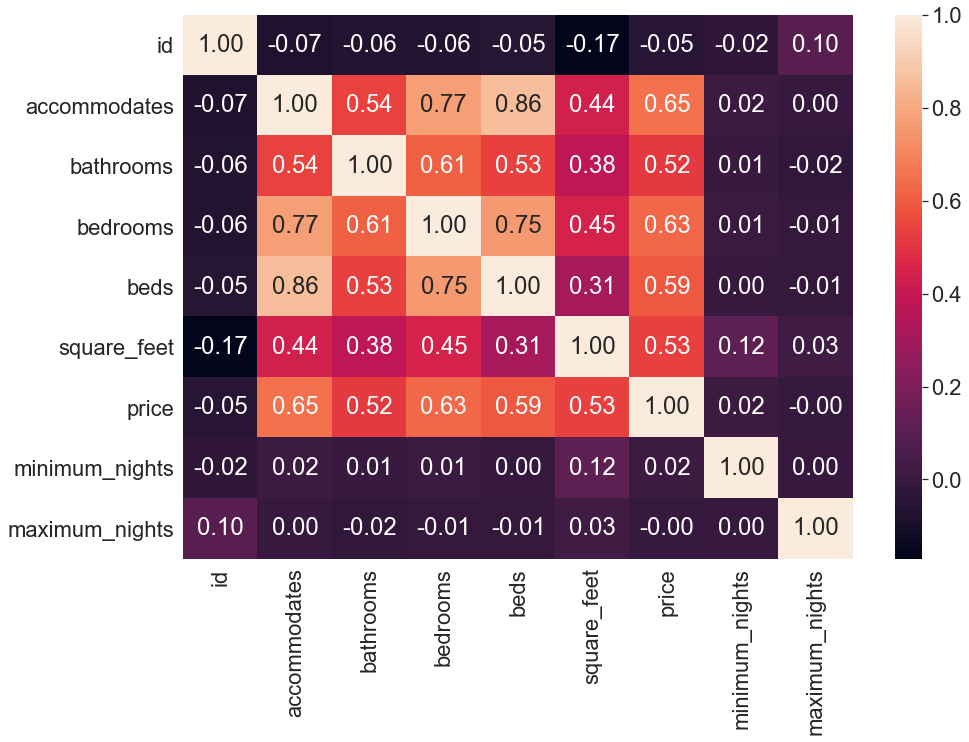

In [39]:
#look at the correlation after dropping the highly correlated data.
fig, ax = plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True, fmt='.2f');

The number of people it accomodates and number of bedrooms in the property correlates in the price and therefore the revenue generation.  This tells me that as an investors i should focus on investing in a house or apartment with maximum accomodation. 

In [40]:
print(df1.amenities[len(df1.amenities)-1])

{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),"Elevator in Building","Hot Tub","Indoor Fireplace","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector",Essentials,Shampoo,Hangers,Iron,"Laptop Friendly Workspace"}


In [41]:
# Cleaning the amenities column 
df1.amenities = df1.amenities.apply(lambda x: x.replace("\"",""))
df1.amenities = df1.amenities.apply(lambda x: x.replace("{",""))
df1.amenities = df1.amenities.apply(lambda x: x.replace("}",""))
df1.amenities = df1.amenities.apply(lambda x: x.split(","))

In [42]:
amenities = pd.DataFrame(columns = ['TV', 'Cable TV', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Indoor Fireplace', 'Heating', 'Smoke Detector', 'Carbon Monoxide Detector', 'Fire Extinguisher', 'Essentials', 'Shampoo','Elevator in Building','Washer','Dryer','Hangers','Iron','Laptop Friendly Workplace','First Aid Kit','Air Conditioning','Family/Kid Friendly','Carbon Monoxide Detector'])

In [43]:
#checking if my function will work properly
s = [str(i) for i in df1.amenities] 
"TV"in s[0]

True

In [44]:
# converting to string series 
df1["amenities"]= df1["amenities"].astype(str) 

In [45]:
# Breaking the amenities column into various columns with boolean 1 or 0 values. 
# The amenities column is in string format of very long text which would correspond to a large number of additional columns if one-hot encoded via Natural Language Processing for instance. 
#Adding a large number of attributes would hinder the predicitve performance.  Because there are only 3,818 samples felt it was ok to use this approach.
#append amenities to the original X dataframe

for i in range(0,len(df1.amenities)):
    is_available_list = []
    for col in amenities.columns:

        if col in df1.amenities[i]:
            is_available_list.append(int(1))
        else:
            is_available_list.append(int(0))
    
    amenities.loc[i] = is_available_list
    #print (is_available_list)

In [46]:
df2 = pd.concat([df1,amenities], axis =1)
#remove the amenities column
#df2 = df2.drop("amenities", axis=1)


In [47]:
df2.columns
#df2.describe

Index(['id', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'country_code', 'country', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'TV',
       'Cable TV', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises',
       'Indoor Fireplace', 'Heating', 'Smoke Detector',
       'Carbon Monoxide Detector', 'Fire Extinguisher', 'Essentials',
       'Shampoo', 'Elevator in Building', 'Washer', 'Dryer', 'Hangers', 'Iron',
       'Laptop Friendly Workplace', 'First Aid Kit', 'Air Conditioning',
       'Family/Kid Friendly', 'Carbon Monoxide Detector'],
      dtype='object')

In [48]:
# Check for missing values in the columns for each dataset- returning missing value as a percentage
(df2.isnull().sum()/len(df2)*100).sort_values(ascending=False)

square_feet                  97.459403
monthly_price                60.267156
security_deposit             51.126244
weekly_price                 47.380828
neighbourhood                10.895757
bathrooms                     0.419068
zipcode                       0.183342
bedrooms                      0.157150
property_type                 0.026192
beds                          0.026192
Carbon Monoxide Detector      0.000000
price                         0.000000
amenities                     0.000000
bed_type                      0.000000
accommodates                  0.000000
maximum_nights                0.000000
room_type                     0.000000
country                       0.000000
country_code                  0.000000
market                        0.000000
state                         0.000000
city                          0.000000
neighbourhood_cleansed        0.000000
minimum_nights                0.000000
jurisdiction_names            0.000000
Family/Kid Friendly      

In [49]:
# drop all the columns that are not relevent
df2 = df2.drop([ 'city', 'state', 'zipcode','neighbourhood','market', 'country_code', 'country','weekly_price',
       'monthly_price', 'security_deposit','minimum_nights', 'maximum_nights',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'square_feet','amenities'], axis=1)

In [50]:
df2.columns


Index(['id', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'TV', 'Cable TV', 'Wireless Internet', 'Kitchen',
       'Free Parking on Premises', 'Indoor Fireplace', 'Heating',
       'Smoke Detector', 'Carbon Monoxide Detector', 'Fire Extinguisher',
       'Essentials', 'Shampoo', 'Elevator in Building', 'Washer', 'Dryer',
       'Hangers', 'Iron', 'Laptop Friendly Workplace', 'First Aid Kit',
       'Air Conditioning', 'Family/Kid Friendly', 'Carbon Monoxide Detector'],
      dtype='object')

In [51]:
# lets combine the listings with amenities features brokend down with the calendar
#For a given property, return all dates it has been rented out
#This dataset will show: For a given property, what is the total_revenue
df_final = pd.merge(df2, df_calendar, left_on='id', right_on='listing_id')

In [52]:
df_final.shape
# Check for missing values in the columns for each dataset- returning missing value as a percentage
(df_final.isnull().sum()/len(df_final)*100).sort_values(ascending=False)

bathrooms                    0.419068
bedrooms                     0.157150
beds                         0.026192
property_type                0.026192
price                        0.000000
Free Parking on Premises     0.000000
Kitchen                      0.000000
Wireless Internet            0.000000
Cable TV                     0.000000
TV                           0.000000
available                    0.000000
bed_type                     0.000000
Heating                      0.000000
accommodates                 0.000000
room_type                    0.000000
neighbourhood_cleansed       0.000000
Indoor Fireplace             0.000000
Smoke Detector               0.000000
date                         0.000000
Iron                         0.000000
listing_id                   0.000000
Carbon Monoxide Detector     0.000000
Family/Kid Friendly          0.000000
Air Conditioning             0.000000
First Aid Kit                0.000000
Laptop Friendly Workplace    0.000000
Hangers     

In [53]:
# Since the df_final is a large dataframe instead of processing i decided to drop them.  After dropping the na still left with 1385540 records.
df_final = df_final.dropna(subset =['bathrooms','bedrooms','beds'], how = 'any')

#now lets check the shape
df_final.shape

(1385540, 35)

In [54]:
#get dummies (encode categoricals)
# I decided to encode the categoric variables to allow the ability to have the influence on the response without imposing the risk of ranking the categories.  
# Becaue the sample size is large enough and each variable would create less then 10 datapoints i decided to use this method.

df_final = pd.get_dummies(df_final, dummy_na=True, columns=["bed_type","room_type","property_type"])

In [55]:
# new shape of the final dataframe

df_final.shape

(1385540, 59)

In [56]:
cat_df = df_final.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe 
#cat_df.columns

Num_df = df_final.select_dtypes(include=['int','float']) # Subset to a dataframe only holding the categorical columns

Num_df.columns

Index(['id', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'listing_id'],
      dtype='object')

In [57]:
#lets check if there are any nulls

df_final.isnull().mean()


id                               0.0
neighbourhood_cleansed           0.0
accommodates                     0.0
bathrooms                        0.0
bedrooms                         0.0
beds                             0.0
price                            0.0
TV                               0.0
Cable TV                         0.0
Wireless Internet                0.0
Kitchen                          0.0
Free Parking on Premises         0.0
Indoor Fireplace                 0.0
Heating                          0.0
Smoke Detector                   0.0
Carbon Monoxide Detector         0.0
Fire Extinguisher                0.0
Essentials                       0.0
Shampoo                          0.0
Elevator in Building             0.0
Washer                           0.0
Dryer                            0.0
Hangers                          0.0
Iron                             0.0
Laptop Friendly Workplace        0.0
First Aid Kit                    0.0
Air Conditioning                 0.0
F

In [58]:
#dropping additional columns not relevant
df_final = df_final.drop(['neighbourhood_cleansed','available','id','date'], axis=1)


In [59]:
#Now we split the dataset into training and testing, the predict prices, using the folowing ML models: Linear Regresion SVM KNN

X = df_final.drop('price', axis =1 ) #X explains all items i want to use to be considered to predict
y = df_final ['price'] # Y response vector

print(X.shape)
print(y.shape)
 
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=40)




(1385540, 54)
(1385540,)


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted_train_price = model.predict(X_train)

In [61]:
predicted_test_price = model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, predicted_test_price), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.5606618170855111 on 415662 values.'

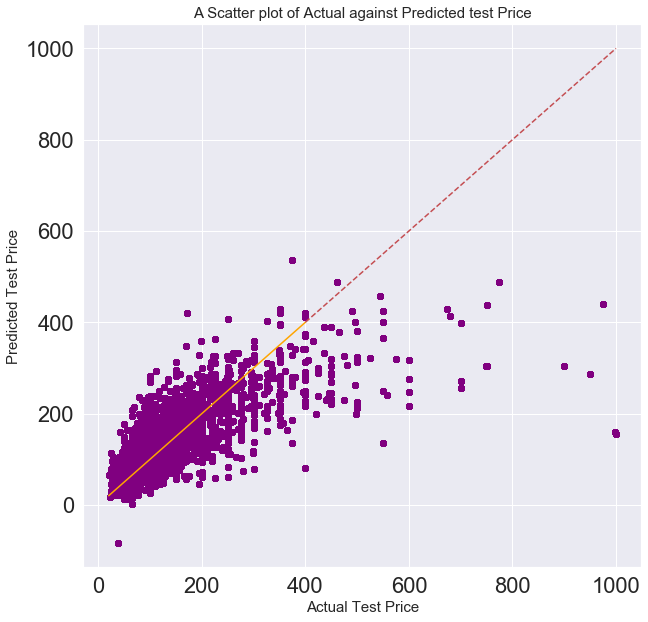

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_test,predicted_test_price, color = 'purple')
#plt.plot(y_test, predicted_test_price, color='blue', linewidth=3)
ax.plot([y_test.min(),400],[y_test.min(),400], color = "orange", linestyle = "solid")
ax.plot([400,1000],[400,1000], "r--")

ax.set_xlabel('Actual Test Price', fontsize = 15)
ax.set_ylabel('Predicted Test Price', fontsize = 15)
ax.set_title("A Scatter plot of Actual against Predicted test Price", fontsize = 15)
#ax.set(font_scale = 1)


plt.show()

In [63]:
#Score using your model
test_score = r2_score(y_test, predicted_test_price)
train_score = r2_score(y_train, predicted_train_price)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5612354108731781.  The rsquared on the test data was 0.5606618170855111.


In [64]:
y_train_pred = predicted_train_price
y_test_pred = predicted_test_price

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3595.125, test: 3570.897
R^2 train: 0.561, test: 0.561


In [65]:
#fit a model
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

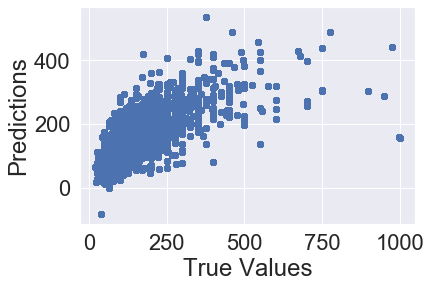

In [66]:
#The line mode

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [67]:
print("score:"),
model.score(X_test, y_test)

score:


0.5606618170855111

In [68]:
# cross validation 

from sklearn.cross_validation import cross_val_score, cross_val_predict 
from sklearn import metrics


/Users/vsutaria/anaconda/envs/MachineLearningBasics/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
#Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=4)
print ("Cross-Validated Scores:", scores)

Cross-Validated Scores: [0.63621329 0.39256216 0.5212651  0.49053941]


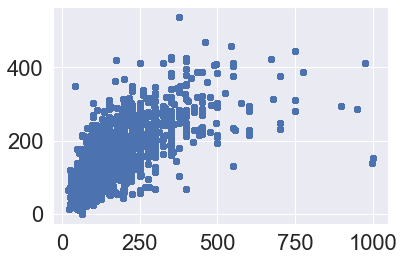

In [70]:
#Make cross validated predictions

predictions = cross_val_predict(model, X,y, cv = 4)
plt.scatter(y, predictions)

In [71]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.5284759482870892


The R2 score is better for Linear Regression 0.56 then the Cross Validation score 0.52.  

In [72]:
# is there a seasonal pattern across the months.  Lets first take the final and only consider the not available.  This is assuming if the rooms are sold out its safe to consider its derived revenue.
df_filtered = pd.merge(df2, df_calendar, left_on='id', right_on='listing_id')
df_filtered = df_filtered.drop(['neighbourhood_cleansed','id'], axis=1)
df_filtered.shape

df_filtered = df_filtered[df_filtered['available'].isin(['f'])]

In [73]:
df_filtered.shape
#df_filtered.columns

(459028, 33)

# What time of the year ABNB most popular in Seattle?

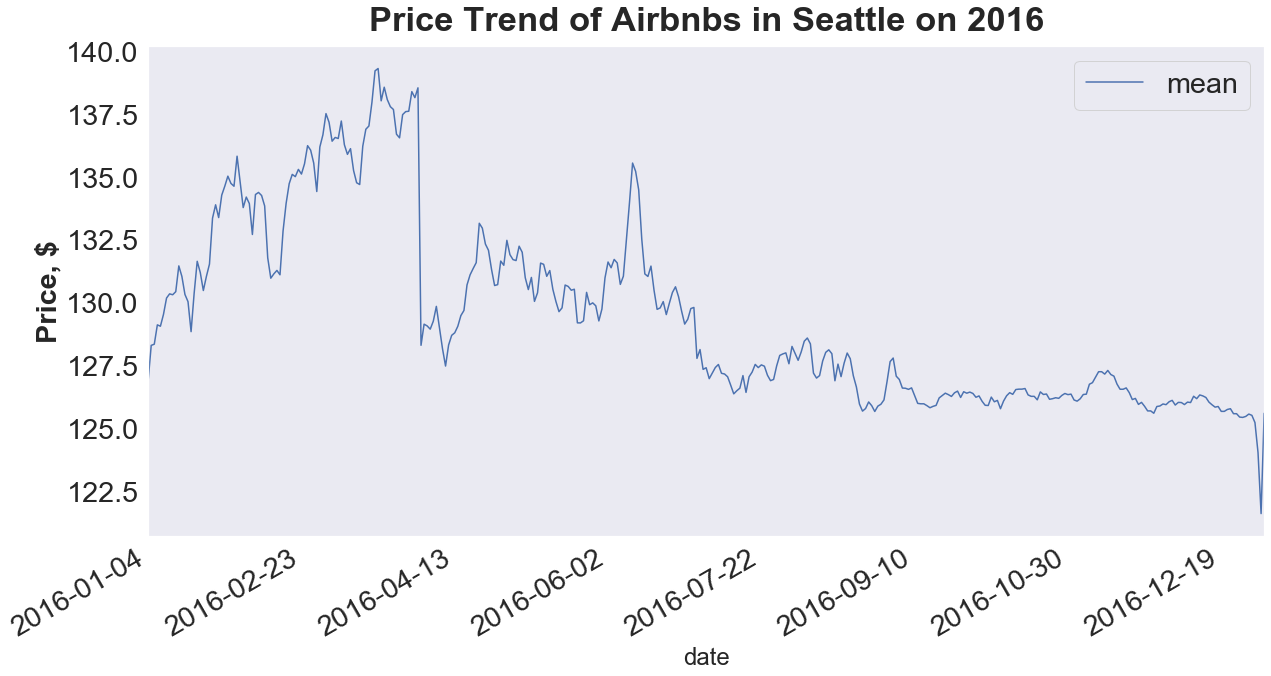

In [74]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# Get the average rent price benchmark
fig,ax = plt.subplots(figsize=(20,10))
df_filtered.groupby("date")["price"].agg(["mean"]).plot(ax=ax,grid=False,fontsize="large");
ax.legend(fontsize="large")
ax.set_ylabel("Price, $", fontsize="large",fontweight="bold")
#myFmt = DateFormatter("%d")
#ax.xaxis.set_major_formatter(myFmt)
# Rotate date labels automatically
fig.autofmt_xdate()
plt.title("Price Trend of Airbnbs in Seattle on 2016",fontsize="x-large",fontweight="bold",y=1.02);

This above graph represents all sold out properties and the average rate.
It looks like Feb to April and June to July are the 4 months the prices are higher average price jumps up to $138 dollars during those months and rest of the year potentially around $128 dollars.


In [75]:

df_filtered.date = pd.to_datetime(df_filtered.date)
dg = df_filtered.groupby(pd.Grouper(key='date', freq='1M')).sum() # groupby each 1 month
dg.index = dg.index.strftime('%B')
dg

,accommodates,bathrooms,bedrooms,beds,price,listing_id
January,163244,60895.0,65144.0,84050.0,6237723.0,273260081207
February,129669,48495.0,52676.0,66997.0,5013744.0,217371685232
March,122562,45227.5,49930.0,63205.0,4718709.0,204980819855
April,130599,48964.0,52833.0,67508.0,5021914.0,236970490519
May,130749,49080.5,52987.0,67476.0,5011381.0,238301502544
June,127445,47662.0,51148.0,65588.0,4893535.0,236292415327
July,149860,54727.5,58567.0,76545.0,5616174.0,270875009777
August,142319,51940.0,55661.0,72513.0,5342659.0,256805181377
September,126057,46173.0,49067.0,64169.0,4714950.0,227900270967
October,121835,44161.5,47308.0,61683.0,4534792.0,219093825459


In [77]:
df_filtered.set_index('date').resample('M')["price"].sum()

date
2016-01-31    6237723.0
2016-02-29    5013744.0
2016-03-31    4718709.0
2016-04-30    5021914.0
2016-05-31    5011381.0
2016-06-30    4893535.0
2016-07-31    5616174.0
2016-08-31    5342659.0
2016-09-30    4714950.0
2016-10-31    4534792.0
2016-11-30    4141330.0
2016-12-31    3937010.0
2017-01-31     239805.0
Freq: M, Name: price, dtype: float64

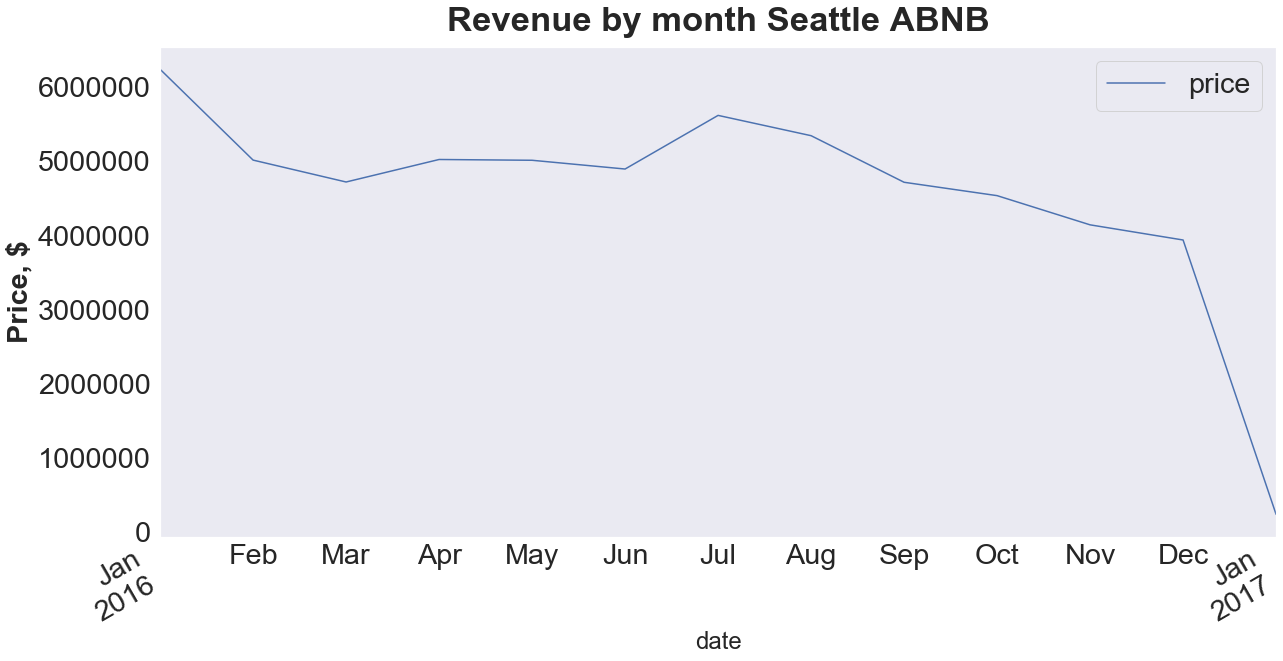

In [78]:
#Revenue by month
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# Get the average rent price benchmark
fig,ax = plt.subplots(figsize=(20,10))
df_filtered.set_index('date').resample('M')["price"].sum().plot(ax=ax,grid=False,fontsize="large");
ax.legend(fontsize="large")
ax.set_ylabel("Price, $", fontsize="large",fontweight="bold")
#myFmt = DateFormatter("%d")
#ax.xaxis.set_major_formatter(myFmt)
# Rotate date labels automatically
fig.autofmt_xdate()
plt.title("Revenue by month Seattle ABNB",fontsize="x-large",fontweight="bold",y=1.02);

In [79]:

df_grouped = df_filtered.groupby(['property_type', pd.Grouper(key='date', freq='M')])['price'].sum().sort_values(ascending = False)
print(df_grouped)


property_type  date      
House          2016-01-31    3083230.0
Apartment      2016-01-31    2600475.0
House          2016-02-29    2537310.0
               2016-07-31    2524966.0
Apartment      2016-07-31    2512515.0
                               ...    
Other          2017-01-31        250.0
Yurt           2016-01-31        200.0
               2017-01-31        200.0
Boat           2017-01-31        170.0
Tent           2017-01-31        100.0
Name: price, Length: 188, dtype: float64


Apartment and Houses made the most revenue in 2017. House toped with $27M in revenue and Apartments $25M in revenue.

In [80]:
df_filtered.columns

Index(['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'TV', 'Cable TV', 'Wireless Internet',
       'Kitchen', 'Free Parking on Premises', 'Indoor Fireplace', 'Heating',
       'Smoke Detector', 'Carbon Monoxide Detector', 'Fire Extinguisher',
       'Essentials', 'Shampoo', 'Elevator in Building', 'Washer', 'Dryer',
       'Hangers', 'Iron', 'Laptop Friendly Workplace', 'First Aid Kit',
       'Air Conditioning', 'Family/Kid Friendly', 'Carbon Monoxide Detector',
       'listing_id', 'date', 'available'],
      dtype='object')

In [81]:
#df_filtered.groupby(['date','property_type']).sum()['price']
df_filtered.groupby(['property_type','date']).sum()['price']

property_type  date      
Apartment      2016-01-04    110136.0
               2016-01-05    106726.0
               2016-01-06    111670.0
               2016-01-07    113550.0
               2016-01-08    111726.0
                               ...   
Yurt           2016-12-29       100.0
               2016-12-30       100.0
               2016-12-31       100.0
               2017-01-01       100.0
               2017-01-02       100.0
Name: price, Length: 5217, dtype: float64

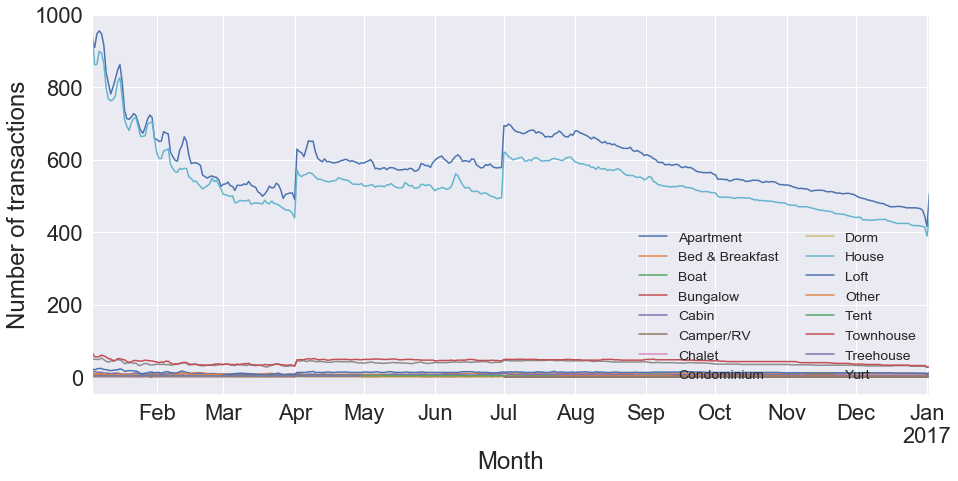

In [82]:
# Highest number of sold out transactions by month.
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_filtered.groupby(['date','property_type']).count()['price'].unstack().plot(ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Number of transactions')
ax.legend(frameon=False, loc='lower right', ncol=2, fontsize = 'xx-small')


The above graph tells us that Apartment property type had the highest number or sold out transactions most of the year and House transactions were trailing right below it.  The rest of the property types had relatively very low transactions. 

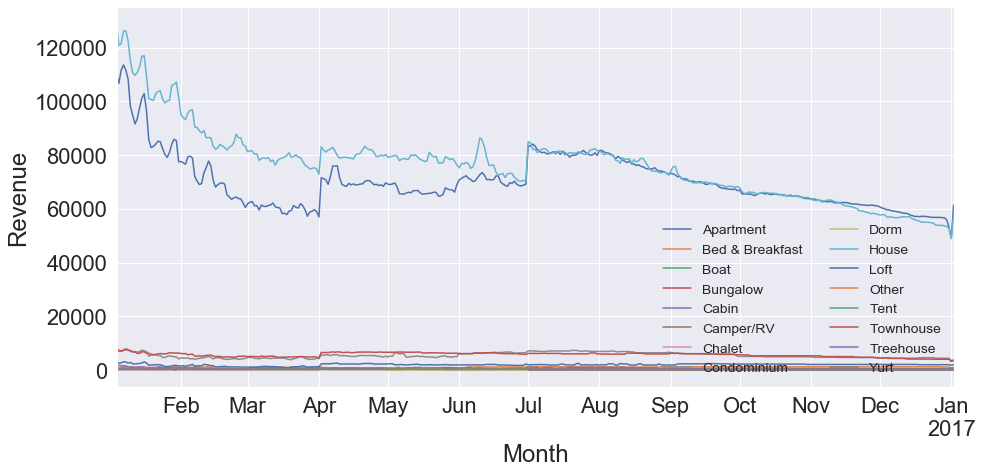

In [83]:
# This graph show the revenue generated by month on sold out transactions.
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_filtered.groupby(['date','property_type']).sum()['price'].unstack().plot(ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Revenue')
ax.legend(frameon=False, loc='lower right', ncol=2, fontsize = 'xx-small')

This graph shows a little different story.  It is telling us that House property type made most revenue.  We know from the previous chart that apartments had higher transactions yet from revenue generations houses made the most.
We already know that House and Apartments are good type of ABNB to invest in but the two graphs lead us to direct our focus on acquiring houses then apartments.

Deployment:
In Conclusion Seattle ABNB from 2016 shows that out of all different types of ABNB type Apartments and Houses rank highest in transactions and revenue. I would suggest investing in a house with maximum bedrooms and accupancy based on the high correlation reflected with the price.
In addition it looks like Mid January to March and May, June and July are the few months the prices are higher, average price jumps up to 138 from 128 suggesting peak times to visit seattle. I would suggest purchasing a property in November/December or perhaps in April timeframe when the season is  low and likely close the deal by peak season approaching. This would help ensure the new buyer gets a good deal on the property purchasing in slow season and then capitalizing the peak rates and revenue in the first few months of ownership.